# The metrics of comparing fields in `Exponax`

There are four major classes of metrics:

1. Spatial-based (that work in physical space)
2. Fourier-based (that work in the coefficient space)
3. Correlation-based
4. Derivative-based (which sugarcoat the functionalities to Fourier-based
   approaches to achieve Sobolev-like norms)

Class 1., 2., and 4. can be further divided into:
1. Absolute metrics (i.e., related to the MAE)
2. Absolute squared metrics (i.e., related to the MSE)
3. Rooted metrics (i.e., related to the RMSE)

Then for each of the three, there is both the absolute version and a
relative/normalized version. For all spatial-based metrics, MAE, MSE, and RMSE
also come with a symmetric version.

All metrics computation work on single state arrays, i.e., arrays with a leading channel axis and one, two, or three subsequent spatial axes. **The arrays shall not have leading batch axes.** To work with batched arrays use `jax.vmap` and then reduce, e.g., by `jnp.mean`. Alternatively, use the convenience wrapper [`exponax.metrics.mean_metric`][].

All metrics **sum over the channel axis**.

 ⚠️ ⚠️ ⚠️ ⚠️ ⚠️ This notebook is a WIP, it will come with future release of Exponax  ⚠️  ⚠️  ⚠️  ⚠️  ⚠️

In [1]:
import jax
import jax.numpy as jnp

In [2]:
import exponax as ex

## The Standard Candidates: MAE, MSE, RMSE

### Absolute Metrics

### Normalized/Relative Metrics

### Why it needs the domain size?

## Correlation

## Fourier-based Metrics

### Wait? Isn't that my MSE? A quick intro Parseval's theorem

### Filtering and Scale-Specific Metrics

### Metrics with derivatives

## Sobolev-like Metrics

### Wait? Who is Sobolev?

In [3]:
u_strongly_diffused = ex.ic.DiffusedNoise(1, intensity=0.001)(
    100, key=jax.random.PRNGKey(0)
)
u_less_diffused = ex.ic.DiffusedNoise(1, intensity=0.0003)(
    100, key=jax.random.PRNGKey(0)
)

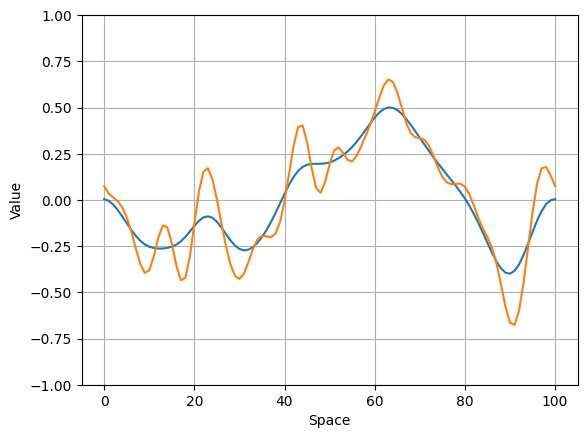

In [4]:
ex.viz.plot_state_1d(jnp.concatenate([u_strongly_diffused, u_less_diffused]))

In [5]:
ex.metrics.nRMSE(u_strongly_diffused, u_less_diffused)

Array(0.37669653, dtype=float32)

In [6]:
ex.metrics.H1_nRMSE(u_strongly_diffused, u_less_diffused)

Array(1.1598254, dtype=float32)

### Application: Detecting Blurry Predictions of Neural Emulators